In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [18]:
df = pd.read_csv("forestfires.csv")

In [23]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

Skew: 1.2178376559535011
Kurtosis: 0.9456680757207487


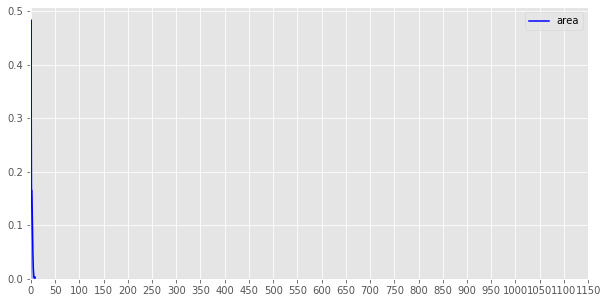

In [24]:
plt.figure(figsize=(10,5))
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))
ax = sns.kdeplot(df['area'],shade=True,color='b')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

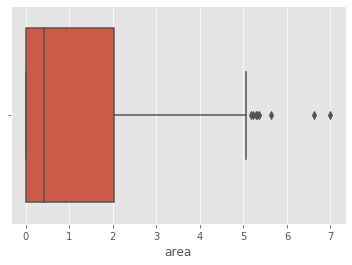

In [25]:
ax = sns.boxplot(df['area'])

In [26]:
# Outlier points
#zscore gives an idea how far from mean, data point is 
y_outliers = df[abs(zscore(df['area'])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
236,2,2,sep,sat,4.537961,121.1,674.4,2.261763,18.2,46,1.8,0.0,5.307971,moderate
237,1,2,sep,tue,4.521789,129.5,692.6,2.079442,18.8,40,2.2,0.0,5.365415,moderate
238,6,5,sep,sat,4.537961,121.1,674.4,2.261763,25.1,27,4.0,0.0,6.995620,moderate
415,8,6,aug,thu,4.562263,222.4,698.6,2.701361,27.5,27,4.9,0.0,6.616440,moderate
479,7,4,jul,mon,4.502029,103.9,431.6,2.001480,22.6,57,4.9,0.0,5.633110,moderate


In [27]:
#independent columns
dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()
cat_columns,num_columns

(['month', 'day', 'damage_category'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

/home/asus/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


ValueError: num must be 1 <= num <= 4, not 5

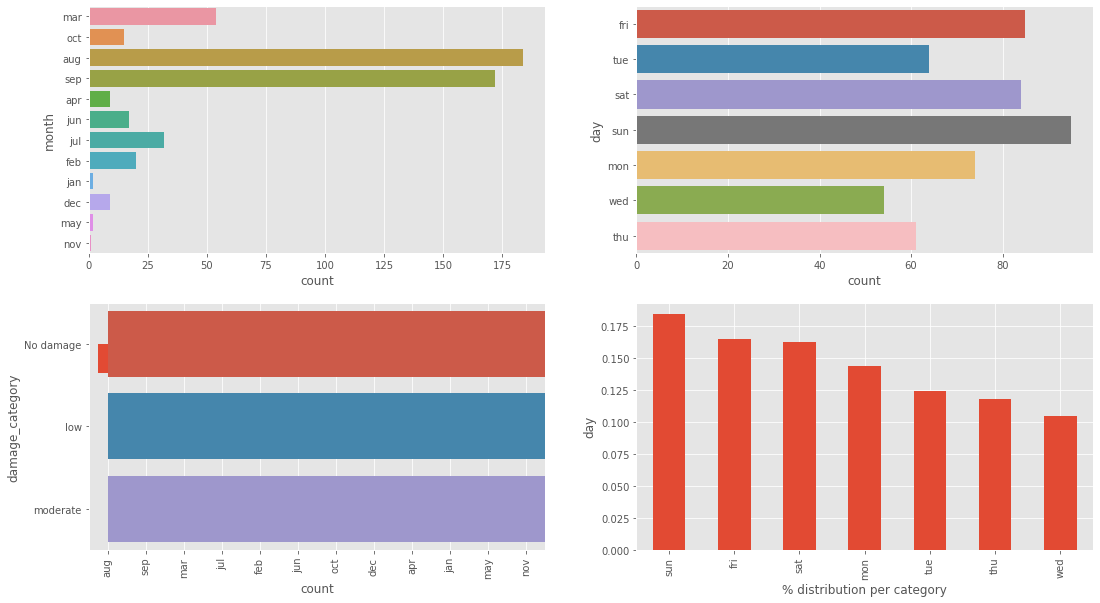

In [28]:
# analyzing categorical columns
plt.figure(figsize=(18,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show() 
#aug and september , high no.

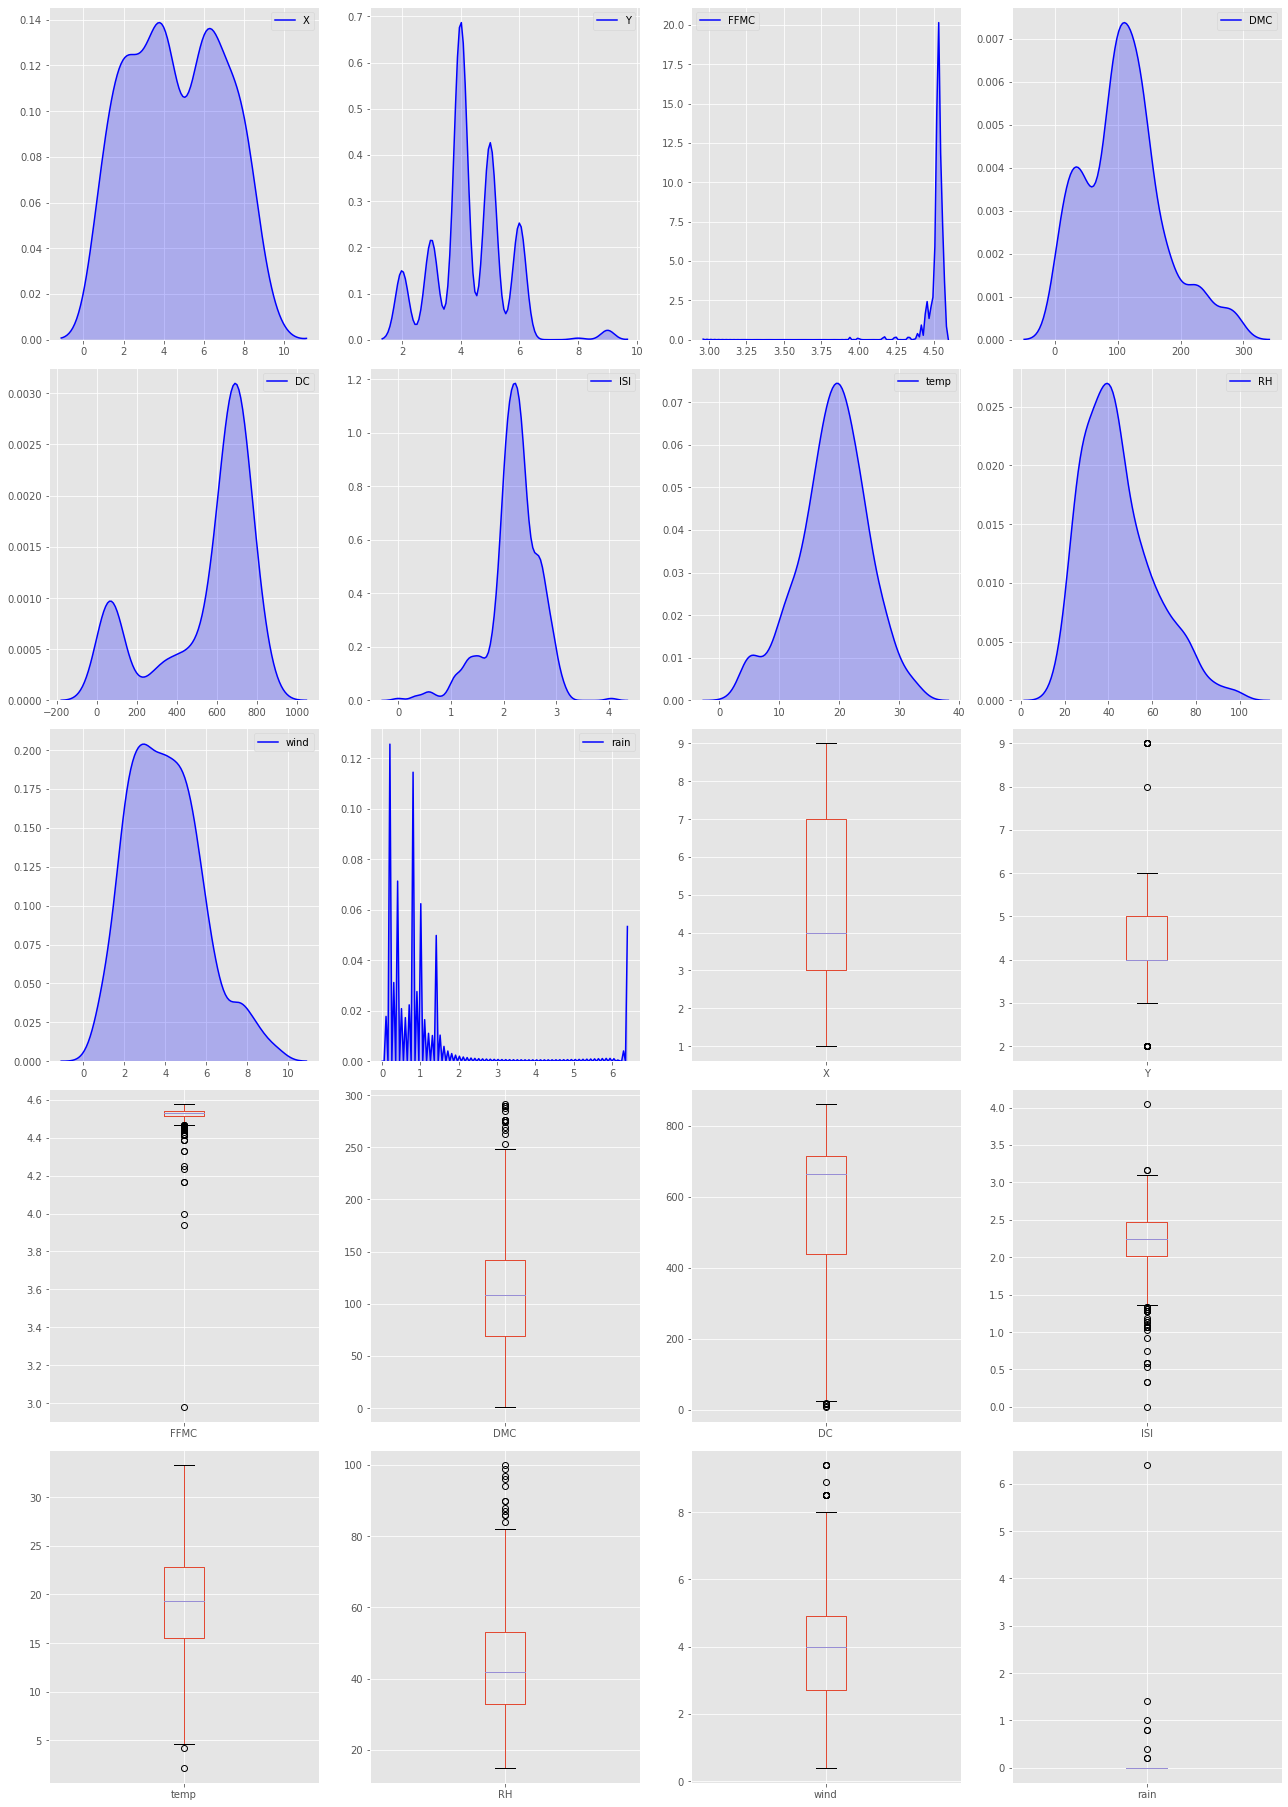

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-11.675394,0.547498,-1.100445,-0.937218,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,185.482383,0.204822,-0.245244,2.584588,0.136166,0.438183,0.054324,421.295964


In [29]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='b',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])
#FFMC, ISI, RAIN ouliers

In [30]:
#categorical variables on the basis of damage
print(df['area'].describe(),'\n')
print(y_outliers)

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area, dtype: float64 

     X  Y month  day      FFMC    DMC     DC       ISI  temp  RH  wind  rain  \
236  2  2   sep  sat  4.537961  121.1  674.4  2.261763  18.2  46   1.8   0.0   
237  1  2   sep  tue  4.521789  129.5  692.6  2.079442  18.8  40   2.2   0.0   
238  6  5   sep  sat  4.537961  121.1  674.4  2.261763  25.1  27   4.0   0.0   
415  8  6   aug  thu  4.562263  222.4  698.6  2.701361  27.5  27   4.9   0.0   
479  7  4   jul  mon  4.502029  103.9  431.6  2.001480  22.6  57   4.9   0.0   

         area damage_category  
236  5.307971        moderate  
237  5.365415        moderate  
238  6.995620        moderate  
415  6.616440        moderate  
479  5.633110        moderate  


In [31]:
# for FFMC outliers removed with zscore
mask = df.loc[:,['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

df = df[mask.values]
df.shape

(510, 14)

In [32]:
out_columns.remove('rain')
df[out_columns] = np.log1p(df[out_columns])
df[out_columns].skew()

ValueError: list.remove(x): x not in list